In [1]:
!pip install --upgrade ipywidgets

     |████████████████████████████████| 139 kB 4.1 MB/s            
     |████████████████████████████████| 2.3 MB 35.2 MB/s            
     |████████████████████████████████| 214 kB 62.5 MB/s            
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.2
    Uninstalling widgetsnbextension-3.5.2:
      Successfully uninstalled widgetsnbextension-3.5.2
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 1.0.2
    Uninstalling jupyterlab-widgets-1.0.2:
      Successfully uninstalled jupyterlab-widgets-1.0.2
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.6.5
    Uninstalling ipywidgets-7.6.5:
      Successfully uninstalled ipywidgets-7.6.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainable-ai-sdk 1.3.2 requires xai-image-widget,

In [2]:
import os
import shutil
from PIL import Image, UnidentifiedImageError

def move_images(source_dir, target_dir, limit=3000):
    # Check if target directory exists, if not, create it
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Counter for the number of moved images
    moved_count = 0

    # List of files to exclude
    excluded_files = ['10.jpg', '7.jpg']

    # Walk through all directories and subdirectories
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            # Check if the file is an image and not in the excluded list
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')) and file not in excluded_files:
                # Construct full file path
                file_path = os.path.join(root, file)
                target_path = os.path.join(target_dir, file)

                try:
                    # Verify if the image can be opened
                    with Image.open(file_path) as img:
                        img.verify()  # Verify the integrity of the image
                    
                    # Move the image
                    shutil.copy(file_path, target_path)
                    print(f"Moved: {file_path} -> {target_path}")
                    moved_count += 1

                except (UnidentifiedImageError, OSError) as e:
                    # Skip files that cannot be read
                    print(f"Skipping {file_path}: {e}")

                # Stop after moving the first 'limit' images
                if moved_count >= limit:
                    print(f"Reached the limit of {limit} images.")
                    return

# Set the source directory and the target directory
source_directory = "/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square"  # Replace with the actual path
target_directory = "/kaggle/working/allimages/shoes"  # Replace with the target folder path

# Move the first 10000 images, excluding 10.jpg and 7.jpg
move_images(source_directory, target_directory, limit=10000)


Moved: /kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Sandals/Athletic/Nike/7525639.191707.jpg -> /kaggle/working/allimages/shoes/7525639.191707.jpg
Moved: /kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Sandals/Athletic/Nike/7525639.151.jpg -> /kaggle/working/allimages/shoes/7525639.151.jpg
Moved: /kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Sandals/Athletic/Teva Kids/7592562.275.jpg -> /kaggle/working/allimages/shoes/7592562.275.jpg
Moved: /kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Sandals/Athletic/Keen Kids/7501314.4535.jpg -> /kaggle/working/allimages/shoes/7501314.4535.jpg
Moved: /kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Sandals/Athletic/Keen Kids/7397030.4535.jpg -> /kaggle/working/allimages/shoes/7397030.4535.jpg
Moved: /kaggle/input/larg

In [5]:
DATA_DIR='/kaggle/working/allimages/'

In [6]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [7]:
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [8]:
train_ds = ImageFolder(DATA_DIR, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)]))

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [9]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

In [11]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

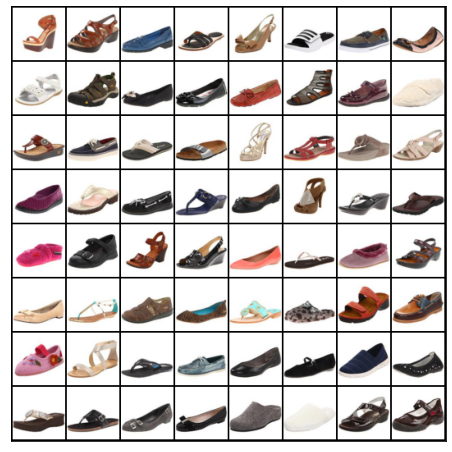

In [12]:
show_batch(train_dl)

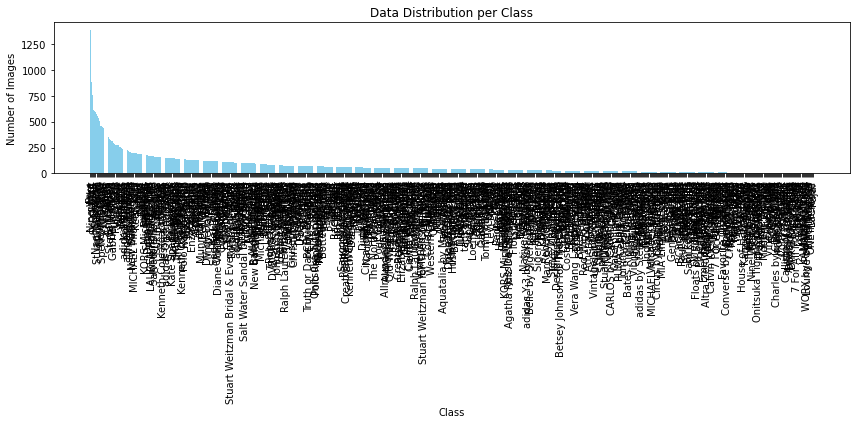

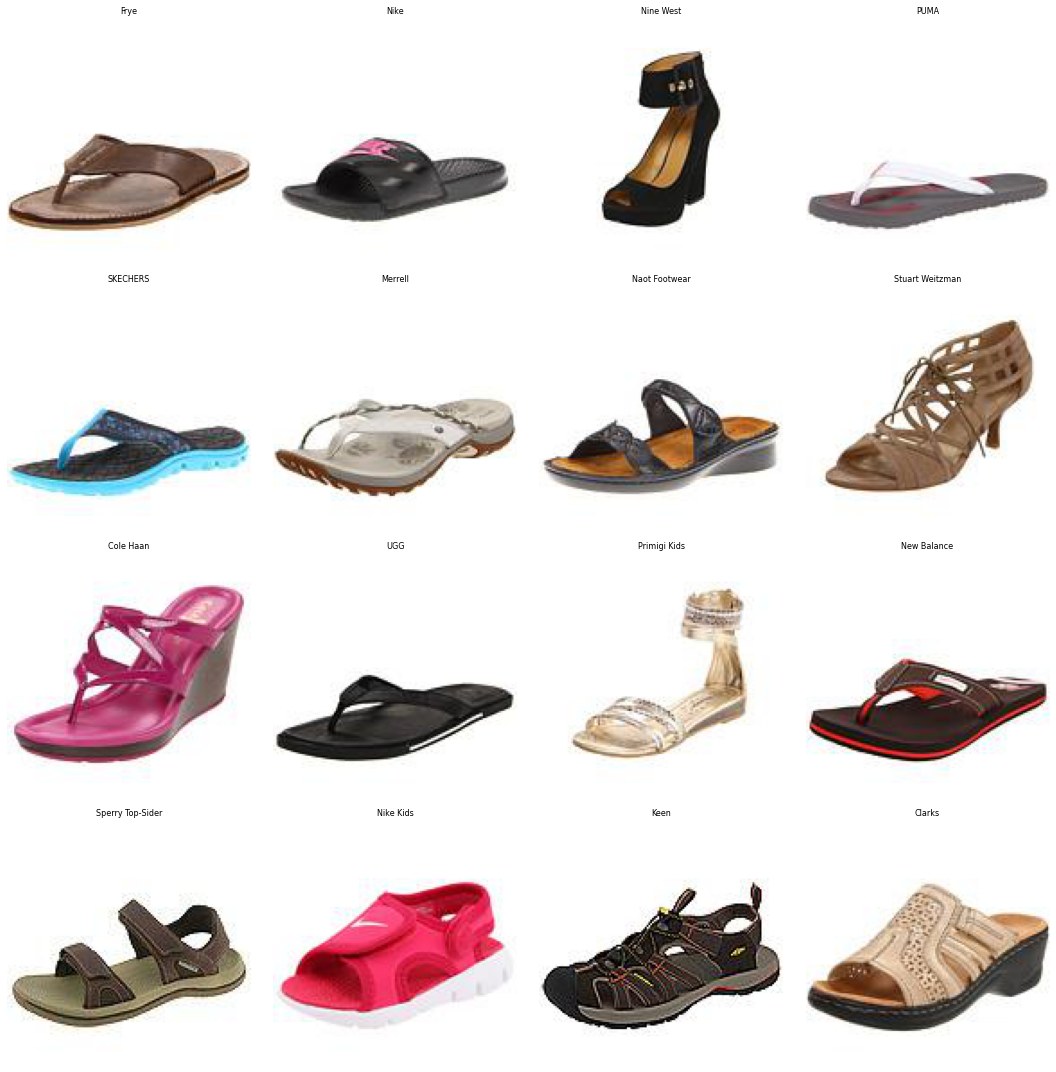

In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

# Define the path to the dataset
dataset_path = '/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square'

# Function to recursively collect image paths and their classes
def get_images_and_classes(base_path):
    image_paths = []
    classes = []
    
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):  # Adjust based on your dataset
                image_paths.append(os.path.join(root, file))
                # Use the folder name closest to the file as the class name
                classes.append(os.path.basename(root))
    
    return image_paths, classes

# Get all image paths and their associated classes
image_paths, classes = get_images_and_classes(dataset_path)

# Count the number of images per class
class_counts = Counter(classes)

# Sort classes by counts
class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

# Plot data distribution using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Data Distribution per Class')
plt.tight_layout()
plt.show()

# Visualize one sample image per class
unique_classes = list(class_counts.keys())
plt.figure(figsize=(15, 15))
for i, cls in enumerate(unique_classes[:16]):  # Display up to 16 classes
    # Find the first image path for the class
    for img_path, img_class in zip(image_paths, classes):
        if img_class == cls:
            sample_image_path = img_path
            break
    
    img = Image.open(sample_image_path)
    
    # Plot the image
    plt.subplot(4, 4, i + 1)
    plt.imshow(img)
    plt.title(cls, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [15]:
device = get_default_device()
device

device(type='cuda')

In [16]:
train_dl = DeviceDataLoader(train_dl, device)

In [17]:
import torch.nn as nn

In [18]:
discriminator = nn.Sequential(
    # in: 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid())

In [19]:
discriminator = to_device(discriminator, device)

In [20]:
latent_size = 128

In [21]:
generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
)

torch.Size([128, 3, 64, 64])


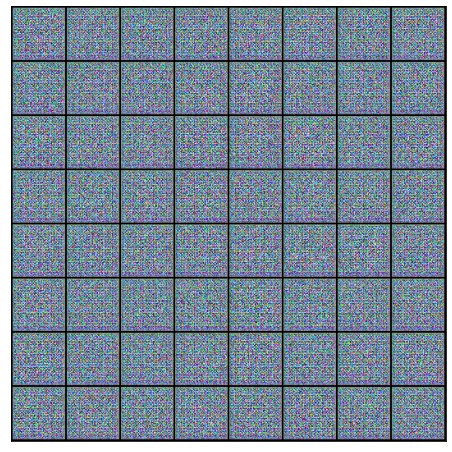

In [22]:
xb = torch.randn(batch_size, latent_size, 1, 1) # random latent tensors
fake_images = generator(xb)
print(fake_images.shape)
show_images(fake_images)

In [23]:
generator = to_device(generator, device)

In [24]:
def train_discriminator(real_images, opt_d):
    # Clear discriminator gradients
    opt_d.zero_grad()

    # Pass real images through discriminator
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()
    
    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Pass fake images through discriminator
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # Update discriminator weights
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

In [25]:
def train_generator(opt_g):
    # Clear generator gradients
    opt_g.zero_grad()
    
    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)
    
    # Try to fool the discriminator
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)
    
    # Update generator weights
    loss.backward()
    opt_g.step()
    
    return loss.item()

In [26]:
from torchvision.utils import save_image

In [27]:
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

In [28]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

In [29]:
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device)

Saving generated-images-0000.png


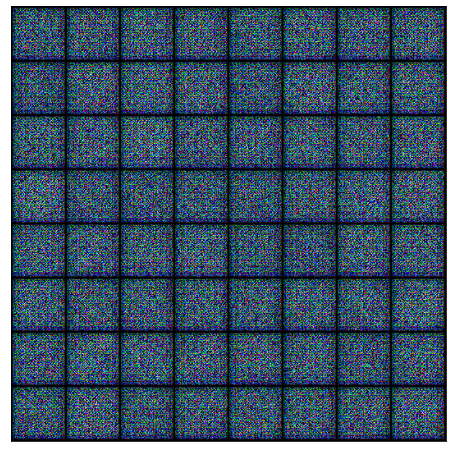

In [30]:
save_samples(0, fixed_latent)

In [31]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [32]:
import matplotlib.pyplot as plt
from tqdm import tqdm

def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()
    
    # Losses & scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            # Train discriminator
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            # Train generator
            loss_g = train_generator(opt_g)
            
        # Record losses & scores
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
        
        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))
    
        # Save generated images
        save_samples(epoch+start_idx, fixed_latent, show=False)

    # Plotting losses after training is complete
    plt.figure(figsize=(10, 6))

    # Plot the generator and discriminator losses
    plt.plot(range(1, epochs + 1), losses_g, label="Generator Loss", color="blue")
    plt.plot(range(1, epochs + 1), losses_d, label="Discriminator Loss", color="red")

    # Adding labels and title
    plt.title("Generator and Discriminator Losses Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Show the plot
    plt.show()

    return losses_g, losses_d, real_scores, fake_scores

# Run the fit function


In [33]:
lr = 0.0002
epochs = 100
image_size = 64
batch_size = 128

100%|██████████| 79/79 [00:11<00:00,  7.09it/s]


Epoch [1/100], loss_g: 7.6881, loss_d: 0.0066, real_score: 0.9971, fake_score: 0.0037
Saving generated-images-0001.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [2/100], loss_g: 7.0167, loss_d: 0.3089, real_score: 0.9193, fake_score: 0.1895
Saving generated-images-0002.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [3/100], loss_g: 5.5439, loss_d: 0.6687, real_score: 0.9058, fake_score: 0.4249
Saving generated-images-0003.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [4/100], loss_g: 1.9537, loss_d: 0.9582, real_score: 0.6256, fake_score: 0.3463
Saving generated-images-0004.png


100%|██████████| 79/79 [00:10<00:00,  7.31it/s]


Epoch [5/100], loss_g: 2.7930, loss_d: 1.2934, real_score: 0.7656, fake_score: 0.6040
Saving generated-images-0005.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [6/100], loss_g: 2.8963, loss_d: 0.7320, real_score: 0.7763, fake_score: 0.3509
Saving generated-images-0006.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [7/100], loss_g: 1.8473, loss_d: 0.7294, real_score: 0.6316, fake_score: 0.1680
Saving generated-images-0007.png


100%|██████████| 79/79 [00:10<00:00,  7.31it/s]


Epoch [8/100], loss_g: 2.0747, loss_d: 0.9596, real_score: 0.7493, fake_score: 0.4437
Saving generated-images-0008.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [9/100], loss_g: 2.1152, loss_d: 1.1374, real_score: 0.5959, fake_score: 0.4118
Saving generated-images-0009.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [10/100], loss_g: 1.7374, loss_d: 0.9819, real_score: 0.5780, fake_score: 0.2973
Saving generated-images-0010.png


100%|██████████| 79/79 [00:10<00:00,  7.31it/s]


Epoch [11/100], loss_g: 2.3089, loss_d: 0.6507, real_score: 0.7127, fake_score: 0.2488
Saving generated-images-0011.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [12/100], loss_g: 1.9963, loss_d: 0.7780, real_score: 0.6489, fake_score: 0.2393
Saving generated-images-0012.png


100%|██████████| 79/79 [00:10<00:00,  7.37it/s]


Epoch [13/100], loss_g: 4.2497, loss_d: 1.3647, real_score: 0.9113, fake_score: 0.6757
Saving generated-images-0013.png


100%|██████████| 79/79 [00:10<00:00,  7.30it/s]


Epoch [14/100], loss_g: 1.3412, loss_d: 1.2204, real_score: 0.4515, fake_score: 0.2703
Saving generated-images-0014.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [15/100], loss_g: 1.0474, loss_d: 1.1087, real_score: 0.4716, fake_score: 0.2121
Saving generated-images-0015.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [16/100], loss_g: 0.9314, loss_d: 1.0780, real_score: 0.3854, fake_score: 0.0509
Saving generated-images-0016.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [17/100], loss_g: 2.8556, loss_d: 0.9673, real_score: 0.7373, fake_score: 0.4479
Saving generated-images-0017.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [18/100], loss_g: 3.2150, loss_d: 0.9032, real_score: 0.8036, fake_score: 0.4682
Saving generated-images-0018.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [19/100], loss_g: 2.8113, loss_d: 1.0227, real_score: 0.8797, fake_score: 0.5565
Saving generated-images-0019.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [20/100], loss_g: 1.1806, loss_d: 1.2399, real_score: 0.3672, fake_score: 0.0617
Saving generated-images-0020.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [21/100], loss_g: 3.6380, loss_d: 1.3874, real_score: 0.9359, fake_score: 0.6927
Saving generated-images-0021.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [22/100], loss_g: 2.0363, loss_d: 0.9583, real_score: 0.7205, fake_score: 0.4214
Saving generated-images-0022.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [23/100], loss_g: 1.1870, loss_d: 1.1444, real_score: 0.3965, fake_score: 0.0959
Saving generated-images-0023.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [24/100], loss_g: 5.5646, loss_d: 0.9035, real_score: 0.9258, fake_score: 0.5169
Saving generated-images-0024.png


100%|██████████| 79/79 [00:10<00:00,  7.30it/s]


Epoch [25/100], loss_g: 0.7323, loss_d: 1.1158, real_score: 0.4149, fake_score: 0.0802
Saving generated-images-0025.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [26/100], loss_g: 1.2701, loss_d: 0.9487, real_score: 0.5633, fake_score: 0.1581
Saving generated-images-0026.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [27/100], loss_g: 1.6490, loss_d: 0.5258, real_score: 0.7210, fake_score: 0.1493
Saving generated-images-0027.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [28/100], loss_g: 1.0431, loss_d: 1.3886, real_score: 0.3144, fake_score: 0.0414
Saving generated-images-0028.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [29/100], loss_g: 3.6523, loss_d: 0.5385, real_score: 0.8914, fake_score: 0.3156
Saving generated-images-0029.png


100%|██████████| 79/79 [00:10<00:00,  7.37it/s]


Epoch [30/100], loss_g: 0.7238, loss_d: 1.1412, real_score: 0.4419, fake_score: 0.1913
Saving generated-images-0030.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [31/100], loss_g: 1.9323, loss_d: 0.6254, real_score: 0.7685, fake_score: 0.2662
Saving generated-images-0031.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [32/100], loss_g: 2.3193, loss_d: 0.5512, real_score: 0.6720, fake_score: 0.0842
Saving generated-images-0032.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [33/100], loss_g: 1.0182, loss_d: 0.9468, real_score: 0.4686, fake_score: 0.1050
Saving generated-images-0033.png


100%|██████████| 79/79 [00:10<00:00,  7.40it/s]


Epoch [34/100], loss_g: 2.7193, loss_d: 0.6248, real_score: 0.7858, fake_score: 0.2867
Saving generated-images-0034.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [35/100], loss_g: 2.6234, loss_d: 0.5198, real_score: 0.8102, fake_score: 0.2416
Saving generated-images-0035.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [36/100], loss_g: 2.6996, loss_d: 0.8970, real_score: 0.8385, fake_score: 0.4460
Saving generated-images-0036.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [37/100], loss_g: 1.2367, loss_d: 0.7758, real_score: 0.5314, fake_score: 0.0471
Saving generated-images-0037.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [38/100], loss_g: 0.9065, loss_d: 0.7959, real_score: 0.5915, fake_score: 0.1653
Saving generated-images-0038.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [39/100], loss_g: 2.4929, loss_d: 0.5474, real_score: 0.6279, fake_score: 0.0579
Saving generated-images-0039.png


100%|██████████| 79/79 [00:10<00:00,  7.37it/s]


Epoch [40/100], loss_g: 3.3688, loss_d: 0.7146, real_score: 0.9145, fake_score: 0.4243
Saving generated-images-0040.png


100%|██████████| 79/79 [00:10<00:00,  7.40it/s]


Epoch [41/100], loss_g: 1.7186, loss_d: 0.5448, real_score: 0.7683, fake_score: 0.2106
Saving generated-images-0041.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [42/100], loss_g: 6.4191, loss_d: 0.9079, real_score: 0.9764, fake_score: 0.5382
Saving generated-images-0042.png


100%|██████████| 79/79 [00:10<00:00,  7.36it/s]


Epoch [43/100], loss_g: 2.4319, loss_d: 0.3688, real_score: 0.8064, fake_score: 0.1195
Saving generated-images-0043.png


100%|██████████| 79/79 [00:10<00:00,  7.36it/s]


Epoch [44/100], loss_g: 3.3648, loss_d: 0.5540, real_score: 0.8711, fake_score: 0.2981
Saving generated-images-0044.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [45/100], loss_g: 3.4153, loss_d: 1.8356, real_score: 0.9806, fake_score: 0.7461
Saving generated-images-0045.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [46/100], loss_g: 2.8777, loss_d: 0.3524, real_score: 0.8480, fake_score: 0.1574
Saving generated-images-0046.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [47/100], loss_g: 3.2877, loss_d: 0.3265, real_score: 0.8230, fake_score: 0.1126
Saving generated-images-0047.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [48/100], loss_g: 2.0294, loss_d: 0.4241, real_score: 0.8054, fake_score: 0.1609
Saving generated-images-0048.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [49/100], loss_g: 5.3669, loss_d: 0.7771, real_score: 0.9557, fake_score: 0.4613
Saving generated-images-0049.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [50/100], loss_g: 1.1257, loss_d: 0.5518, real_score: 0.7192, fake_score: 0.1543
Saving generated-images-0050.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [51/100], loss_g: 2.6774, loss_d: 0.2035, real_score: 0.8639, fake_score: 0.0497
Saving generated-images-0051.png


100%|██████████| 79/79 [00:10<00:00,  7.37it/s]


Epoch [52/100], loss_g: 4.1624, loss_d: 0.2136, real_score: 0.9468, fake_score: 0.1290
Saving generated-images-0052.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [53/100], loss_g: 2.4860, loss_d: 0.2606, real_score: 0.8577, fake_score: 0.0881
Saving generated-images-0053.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [54/100], loss_g: 5.7683, loss_d: 0.5599, real_score: 0.9648, fake_score: 0.3625
Saving generated-images-0054.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [55/100], loss_g: 2.7581, loss_d: 0.5176, real_score: 0.7385, fake_score: 0.1275
Saving generated-images-0055.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [56/100], loss_g: 0.5189, loss_d: 0.6028, real_score: 0.6531, fake_score: 0.0570
Saving generated-images-0056.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [57/100], loss_g: 2.7158, loss_d: 0.3714, real_score: 0.8522, fake_score: 0.1649
Saving generated-images-0057.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [58/100], loss_g: 1.6572, loss_d: 0.2871, real_score: 0.8172, fake_score: 0.0594
Saving generated-images-0058.png


100%|██████████| 79/79 [00:10<00:00,  7.37it/s]


Epoch [59/100], loss_g: 3.0437, loss_d: 0.3663, real_score: 0.8061, fake_score: 0.1106
Saving generated-images-0059.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [60/100], loss_g: 2.3226, loss_d: 1.0152, real_score: 0.4557, fake_score: 0.0033
Saving generated-images-0060.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [61/100], loss_g: 3.4752, loss_d: 0.2482, real_score: 0.9106, fake_score: 0.1261
Saving generated-images-0061.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [62/100], loss_g: 4.1642, loss_d: 0.3199, real_score: 0.9262, fake_score: 0.1943
Saving generated-images-0062.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [63/100], loss_g: 2.4724, loss_d: 0.1723, real_score: 0.9150, fake_score: 0.0754
Saving generated-images-0063.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [64/100], loss_g: 2.1230, loss_d: 0.6368, real_score: 0.8931, fake_score: 0.3399
Saving generated-images-0064.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [65/100], loss_g: 4.8710, loss_d: 0.2158, real_score: 0.9834, fake_score: 0.1666
Saving generated-images-0065.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [66/100], loss_g: 3.9572, loss_d: 0.1902, real_score: 0.9524, fake_score: 0.1201
Saving generated-images-0066.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [67/100], loss_g: 0.6956, loss_d: 2.8636, real_score: 0.0859, fake_score: 0.0039
Saving generated-images-0067.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [68/100], loss_g: 4.0051, loss_d: 0.2500, real_score: 0.9487, fake_score: 0.1661
Saving generated-images-0068.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [69/100], loss_g: 0.8243, loss_d: 0.4971, real_score: 0.6514, fake_score: 0.0306
Saving generated-images-0069.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [70/100], loss_g: 3.4766, loss_d: 0.1508, real_score: 0.9317, fake_score: 0.0694
Saving generated-images-0070.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [71/100], loss_g: 0.9502, loss_d: 0.7996, real_score: 0.5798, fake_score: 0.1072
Saving generated-images-0071.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [72/100], loss_g: 1.0287, loss_d: 0.6215, real_score: 0.5820, fake_score: 0.0099
Saving generated-images-0072.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [73/100], loss_g: 3.0320, loss_d: 0.1599, real_score: 0.9144, fake_score: 0.0604
Saving generated-images-0073.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [74/100], loss_g: 4.6797, loss_d: 0.1047, real_score: 0.9826, fake_score: 0.0791
Saving generated-images-0074.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [75/100], loss_g: 4.1937, loss_d: 0.1700, real_score: 0.9801, fake_score: 0.1306
Saving generated-images-0075.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [76/100], loss_g: 3.5733, loss_d: 0.2038, real_score: 0.9067, fake_score: 0.0900
Saving generated-images-0076.png


100%|██████████| 79/79 [00:10<00:00,  7.36it/s]


Epoch [77/100], loss_g: 0.2030, loss_d: 1.7139, real_score: 0.2089, fake_score: 0.0064
Saving generated-images-0077.png


100%|██████████| 79/79 [00:10<00:00,  7.41it/s]


Epoch [78/100], loss_g: 2.5178, loss_d: 0.5289, real_score: 0.6513, fake_score: 0.0140
Saving generated-images-0078.png


100%|██████████| 79/79 [00:10<00:00,  7.41it/s]


Epoch [79/100], loss_g: 1.3884, loss_d: 0.3655, real_score: 0.7519, fake_score: 0.0450
Saving generated-images-0079.png


100%|██████████| 79/79 [00:10<00:00,  7.36it/s]


Epoch [80/100], loss_g: 3.1368, loss_d: 0.0944, real_score: 0.9369, fake_score: 0.0273
Saving generated-images-0080.png


100%|██████████| 79/79 [00:10<00:00,  7.36it/s]


Epoch [81/100], loss_g: 2.7207, loss_d: 0.1684, real_score: 0.8650, fake_score: 0.0103
Saving generated-images-0081.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [82/100], loss_g: 1.9012, loss_d: 0.2406, real_score: 0.8365, fake_score: 0.0493
Saving generated-images-0082.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [83/100], loss_g: 2.9854, loss_d: 0.2111, real_score: 0.8653, fake_score: 0.0576
Saving generated-images-0083.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [84/100], loss_g: 4.9575, loss_d: 0.0460, real_score: 0.9879, fake_score: 0.0320
Saving generated-images-0084.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [85/100], loss_g: 3.2013, loss_d: 0.1555, real_score: 0.8732, fake_score: 0.0136
Saving generated-images-0085.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [86/100], loss_g: 5.9759, loss_d: 2.2126, real_score: 0.9905, fake_score: 0.7857
Saving generated-images-0086.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [87/100], loss_g: 0.2159, loss_d: 0.6483, real_score: 0.6239, fake_score: 0.0345
Saving generated-images-0087.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [88/100], loss_g: 2.2106, loss_d: 0.9557, real_score: 0.8710, fake_score: 0.4508
Saving generated-images-0088.png


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch [89/100], loss_g: 2.9031, loss_d: 0.1550, real_score: 0.9248, fake_score: 0.0668
Saving generated-images-0089.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [90/100], loss_g: 2.6286, loss_d: 0.1060, real_score: 0.9242, fake_score: 0.0242
Saving generated-images-0090.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [91/100], loss_g: 1.5083, loss_d: 1.0809, real_score: 0.7332, fake_score: 0.4075
Saving generated-images-0091.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [92/100], loss_g: 0.4453, loss_d: 0.9823, real_score: 0.4289, fake_score: 0.0184
Saving generated-images-0092.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [93/100], loss_g: 5.0101, loss_d: 0.1633, real_score: 0.9648, fake_score: 0.1084
Saving generated-images-0093.png


100%|██████████| 79/79 [00:10<00:00,  7.34it/s]


Epoch [94/100], loss_g: 4.2274, loss_d: 0.0926, real_score: 0.9919, fake_score: 0.0762
Saving generated-images-0094.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [95/100], loss_g: 4.1569, loss_d: 0.1354, real_score: 0.9755, fake_score: 0.0968
Saving generated-images-0095.png


100%|██████████| 79/79 [00:10<00:00,  7.39it/s]


Epoch [96/100], loss_g: 2.9748, loss_d: 0.1303, real_score: 0.9295, fake_score: 0.0498
Saving generated-images-0096.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [97/100], loss_g: 1.0967, loss_d: 0.2422, real_score: 0.8177, fake_score: 0.0275
Saving generated-images-0097.png


100%|██████████| 79/79 [00:10<00:00,  7.35it/s]


Epoch [98/100], loss_g: 4.7977, loss_d: 0.1466, real_score: 0.9530, fake_score: 0.0866
Saving generated-images-0098.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [99/100], loss_g: 5.3737, loss_d: 0.0518, real_score: 0.9754, fake_score: 0.0256
Saving generated-images-0099.png


100%|██████████| 79/79 [00:10<00:00,  7.33it/s]


Epoch [100/100], loss_g: 4.0263, loss_d: 0.2192, real_score: 0.9687, fake_score: 0.1485
Saving generated-images-0100.png


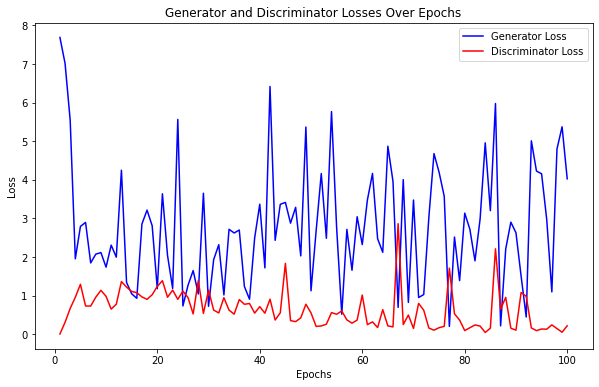

In [34]:
history = fit(epochs, lr)

In [44]:
losses_g, losses_d, real_scores, fake_scores = history

In [45]:
# Save the model checkpoints 
torch.save(generator.state_dict(), 'G.pth')
torch.save(discriminator.state_dict(), 'D.pth')

In [46]:
from IPython.display import Image

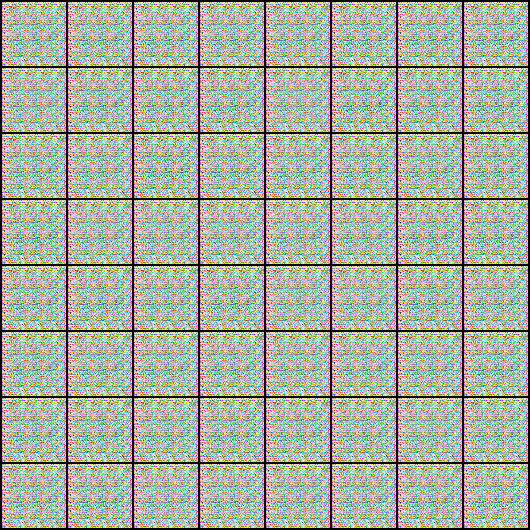

In [47]:
Image('./generated/generated-images-0001.png')

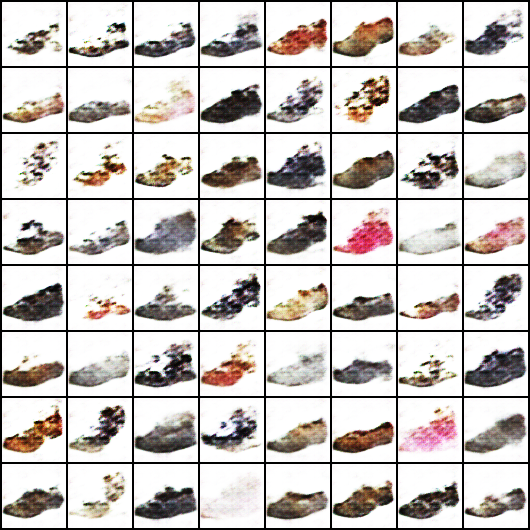

In [48]:
Image('./generated/generated-images-0010.png')

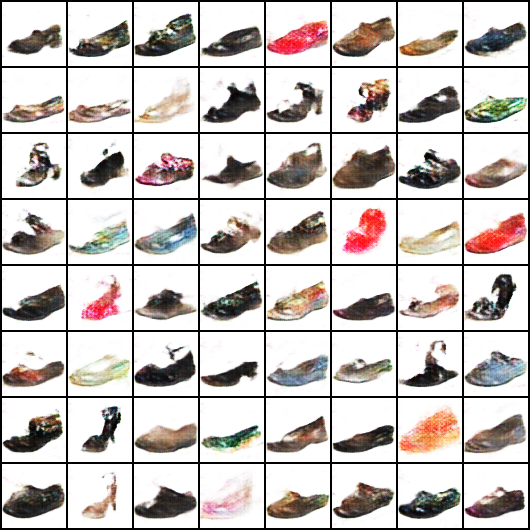

In [49]:
Image('./generated/generated-images-0020.png')

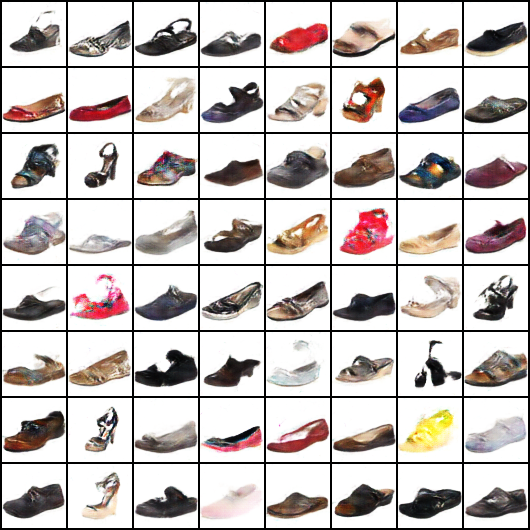

In [53]:
Image('./generated/generated-images-0099.png')    ###THIS IS FINAL GENERATAED IMAGE WITH BEST QUALITY     

We can also visualize how the loss changes over time. Visualizing losses is quite useful for debugging the training process. For GANs, we expect the generator's loss to reduce over time, without the discriminator's loss getting too high.

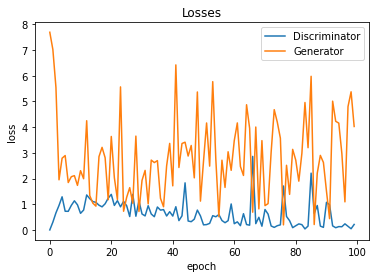

In [51]:
plt.plot(losses_d, '-')
plt.plot(losses_g, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

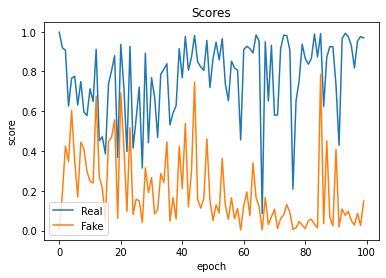

In [52]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real', 'Fake'])
plt.title('Scores');